## Read in the appropriate packages 

In [1]:
#conda install -c conda-forge frozendict
#conda install -c conda-forge yfinance

In [1]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series 


## 1. Download stock data - single and multiple and get it into the right format

A way of getting the historical stock data is to use the pandas_datareader library. 
It uses Yahoo’s Finance API to load in the data. 

In [35]:
# Read the csv
stock_df = pd.read_csv("GOOGL_2006-01-01_to_2018-01-01.csv")

In [36]:
stock_df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL


In [37]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [38]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [39]:
stock_df.set_index('Date', inplace=True)

In [40]:
stock_df.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [41]:
stock_df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...
2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL


## 2. Exploratory Data Analysis (EDA)


In [42]:
# 1. Descriptive Statistics
stock_df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


<AxesSubplot:>

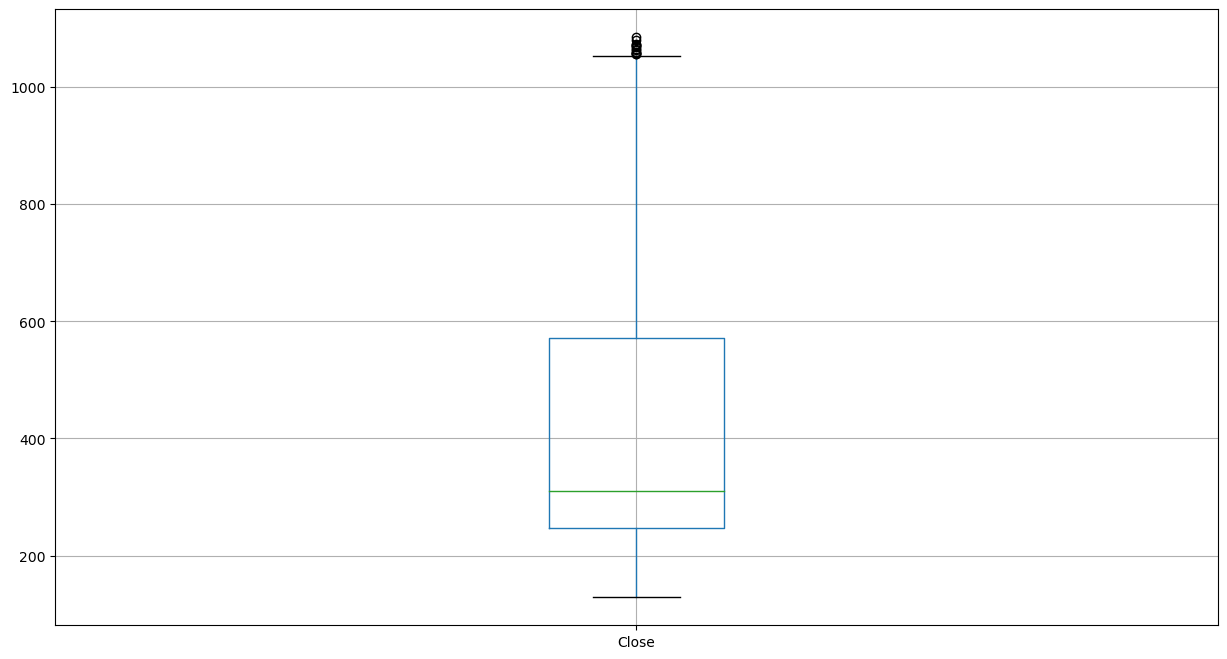

In [43]:
plt.figure(figsize=(15,8))
stock_df[['Close']].boxplot()

In [44]:
# 2. Check for missing values
stock_df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [45]:
# 3. Find the indexes that are missing
stock_start_date = '2006-01-03'
stock_end_date = '2017-12-29'
pd.date_range(start = stock_start_date, end = stock_end_date).difference(stock_df.index)

DatetimeIndex(['2006-01-07', '2006-01-08', '2006-01-14', '2006-01-15',
               '2006-01-16', '2006-01-21', '2006-01-22', '2006-01-28',
               '2006-01-29', '2006-02-04',
               ...
               '2017-11-26', '2017-12-02', '2017-12-03', '2017-12-09',
               '2017-12-10', '2017-12-16', '2017-12-17', '2017-12-23',
               '2017-12-24', '2017-12-25'],
              dtype='datetime64[ns]', length=1360, freq=None)

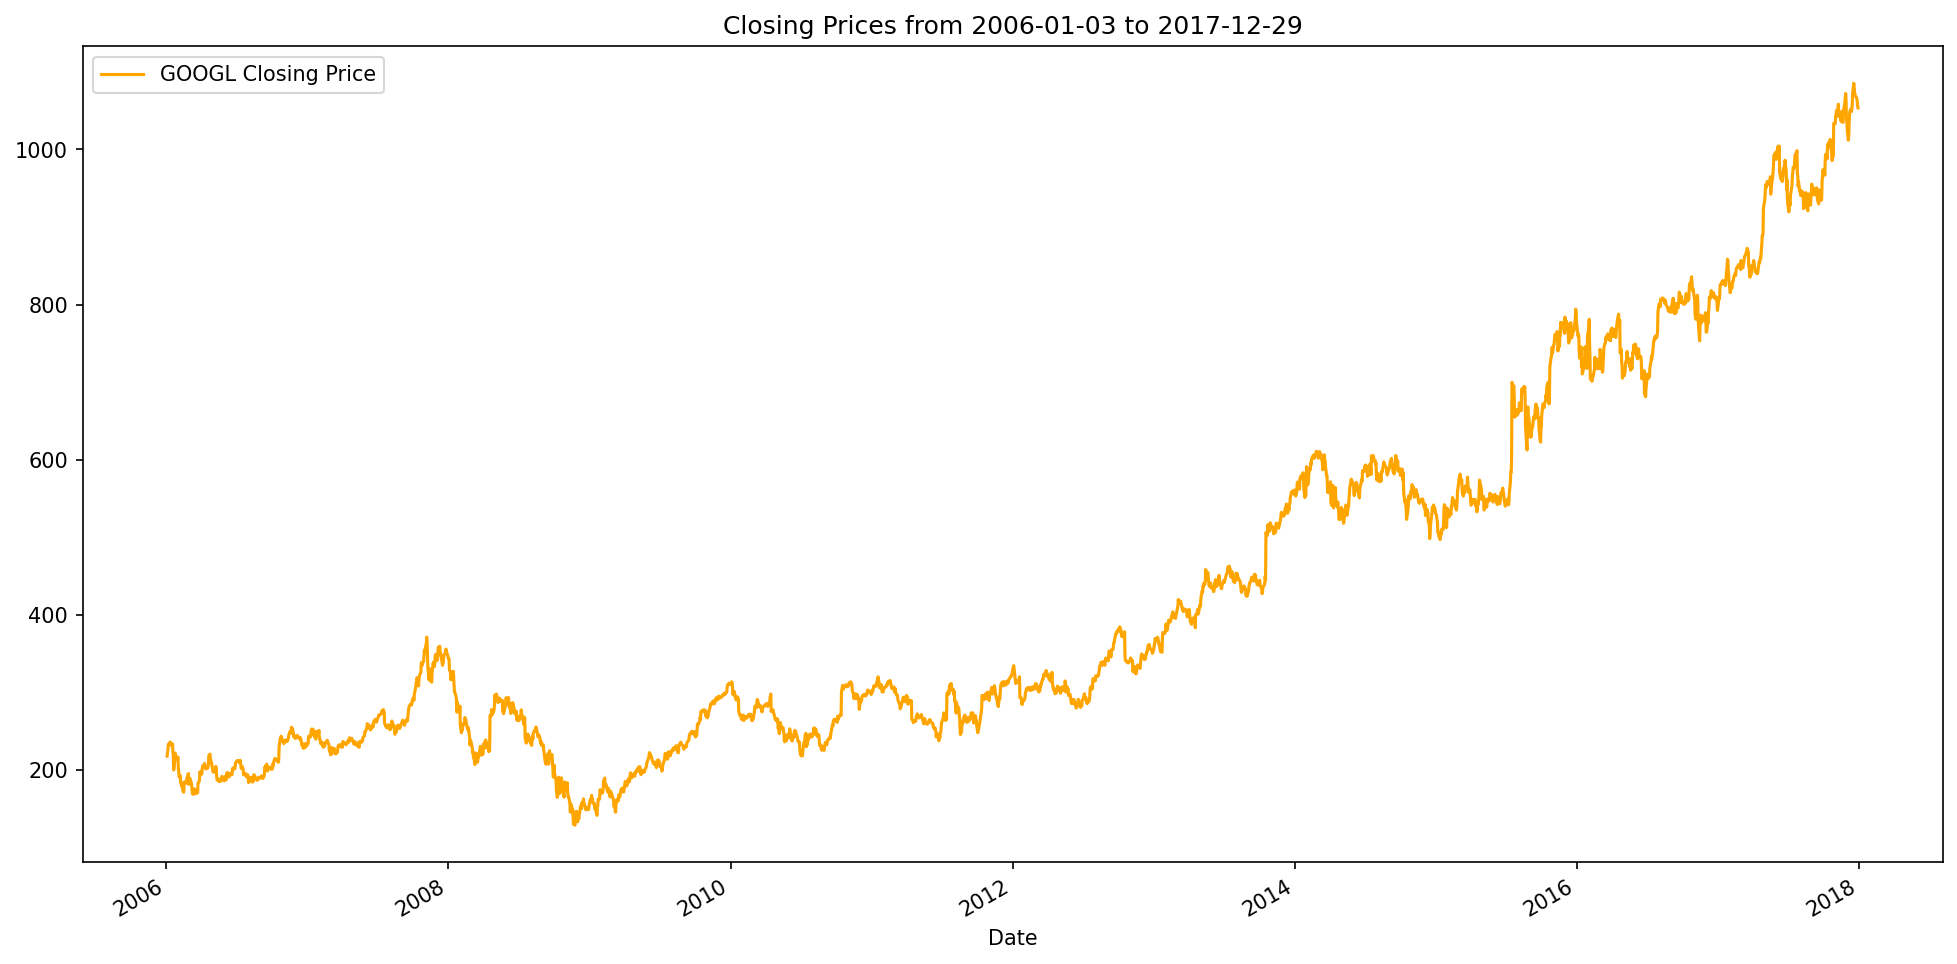

In [46]:
# Visualizing The Close Price of the stocks
  
# to set the plot size
plt.figure(figsize=(16, 8), dpi=150) #dpi = resolution. default 100.
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df['Close'].plot(label='GOOGL Closing Price', color='orange')
  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


In [47]:
stock_df = stock_df[['Close']]
stock_df

,Close
Date,
2006-01-03,217.83
2006-01-04,222.84
2006-01-05,225.85
2006-01-06,233.06
2006-01-09,233.68
...,...
2017-12-22,1068.86
2017-12-26,1065.85
2017-12-27,1060.20


In [48]:
# first, fill the misssing values with 'NaN'. Reindexing. 
stock_df_NaN = stock_df.reindex(pd.date_range(stock_start_date, stock_end_date), fill_value= np.NaN)
stock_df_NaN

,Close
2006-01-03,217.83
2006-01-04,222.84
2006-01-05,225.85
2006-01-06,233.06
2006-01-07,NaN
...,...
2017-12-25,NaN
2017-12-26,1065.85
2017-12-27,1060.20
2017-12-28,1055.95


In [49]:
# next, let's use ALL the different imputation techniques on MSFT and just the spline on SPY 

stock_df_imputed = stock_df_NaN.copy()
stock_df_imputed['Spline']= stock_df_imputed['Close'].interpolate(method='spline', order=1, limit=10, limit_direction='both')

stock_df_imputed.round(2)


,Close,Spline
2006-01-03,217.83,217.83
2006-01-04,222.84,222.84
2006-01-05,225.85,225.85
2006-01-06,233.06,233.06
2006-01-07,NaN,232.77
...,...,...
2017-12-25,NaN,1064.60
2017-12-26,1065.85,1065.85
2017-12-27,1060.20,1060.20
2017-12-28,1055.95,1055.95


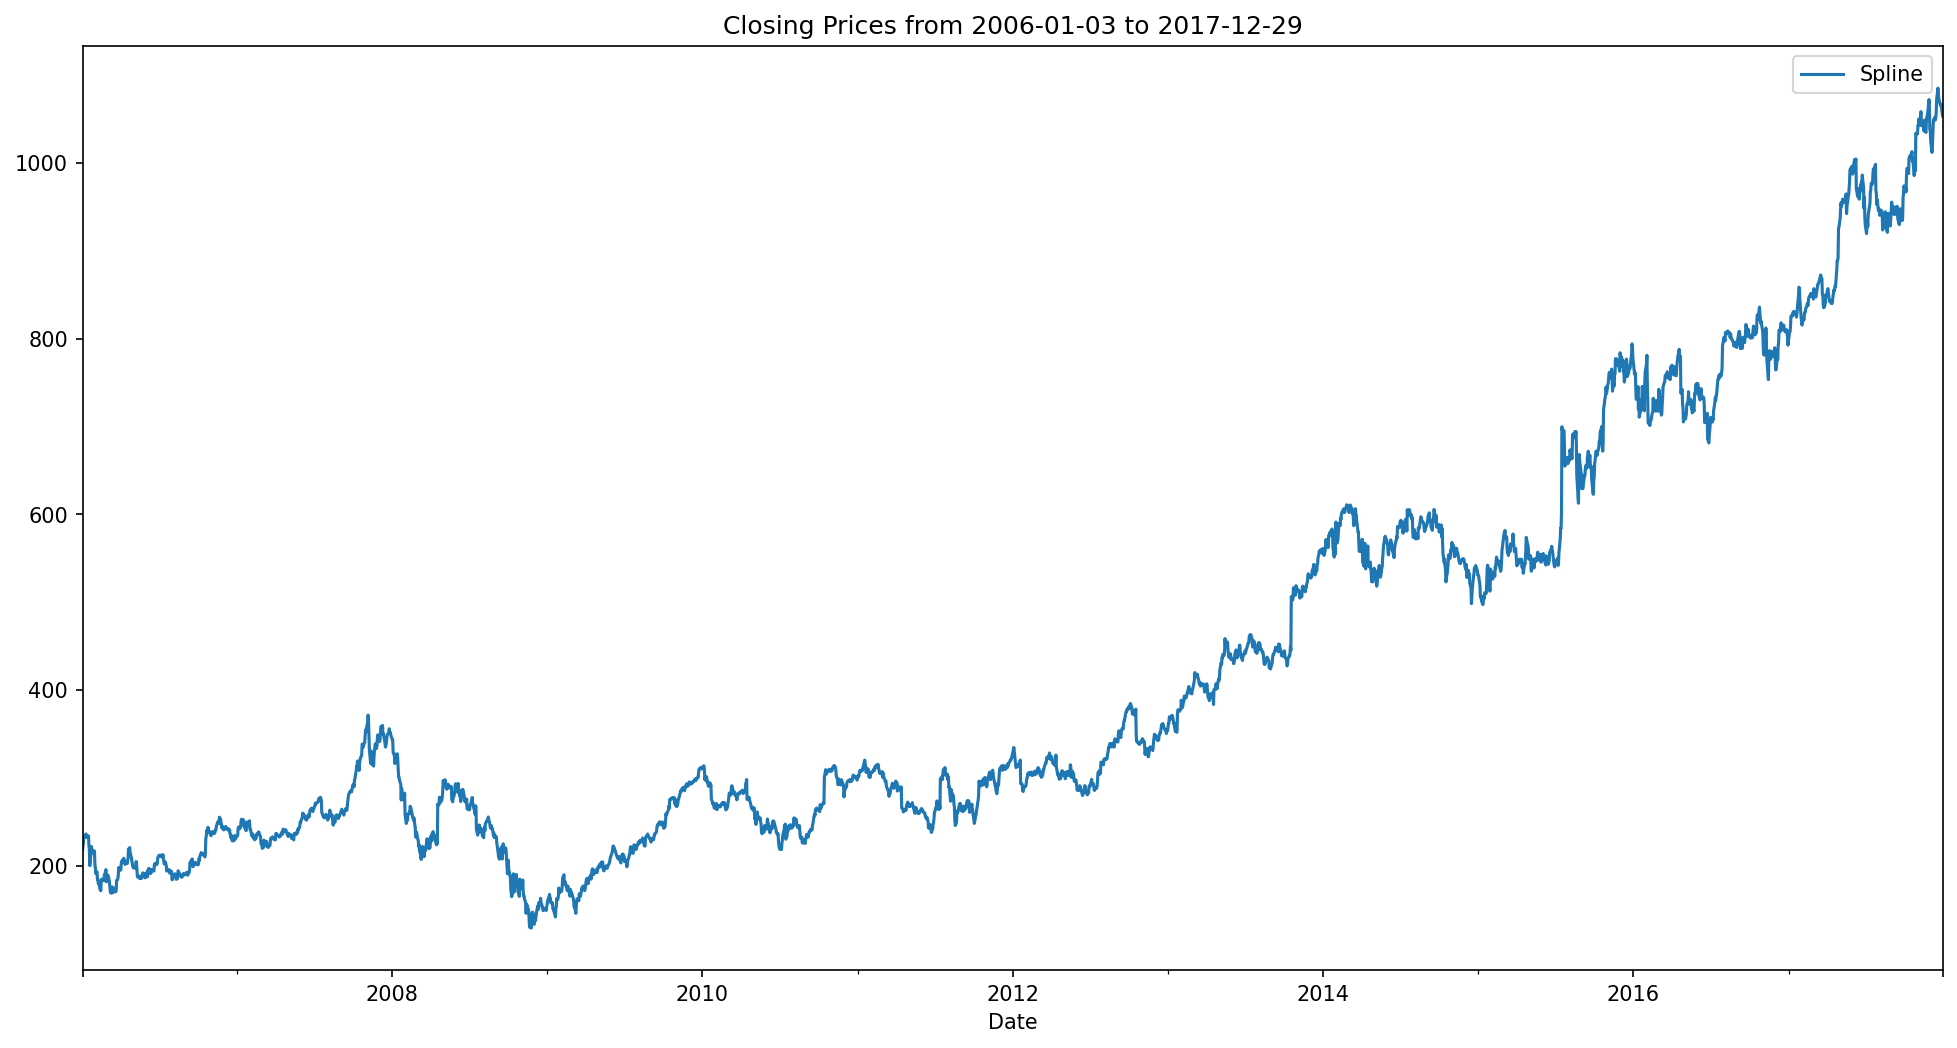

In [50]:
#Plot

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
#stock_df_multiple_imputed['MSFT_Median'].plot(label='MSFT Median', color='orange')
#stock_df_multiple_imputed['MSFT_Linear'].plot(label='MSFT Linear')
#stock_df_multiple_imputed['MSFT_bfill'].plot(label='MSFT Backfill')
stock_df_imputed['Spline'].plot(label='Spline')

  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


<AxesSubplot:ylabel='Spline'>

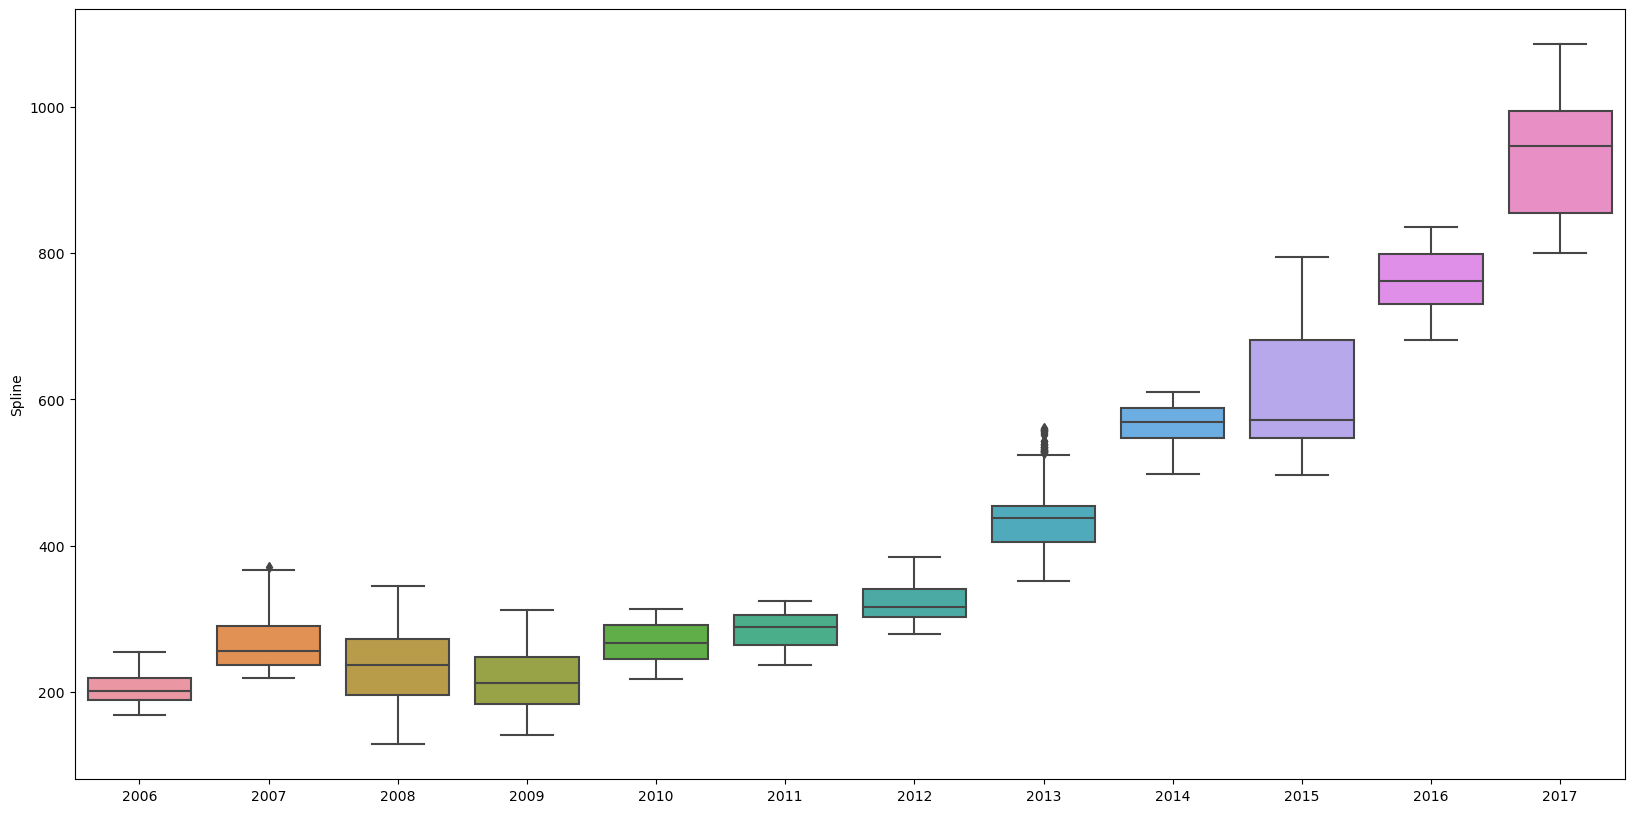

In [51]:
# price variation for each year

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_imputed.index.year,
                y = stock_df_imputed['Spline'], 
                ax = ax)

<AxesSubplot:ylabel='Spline'>

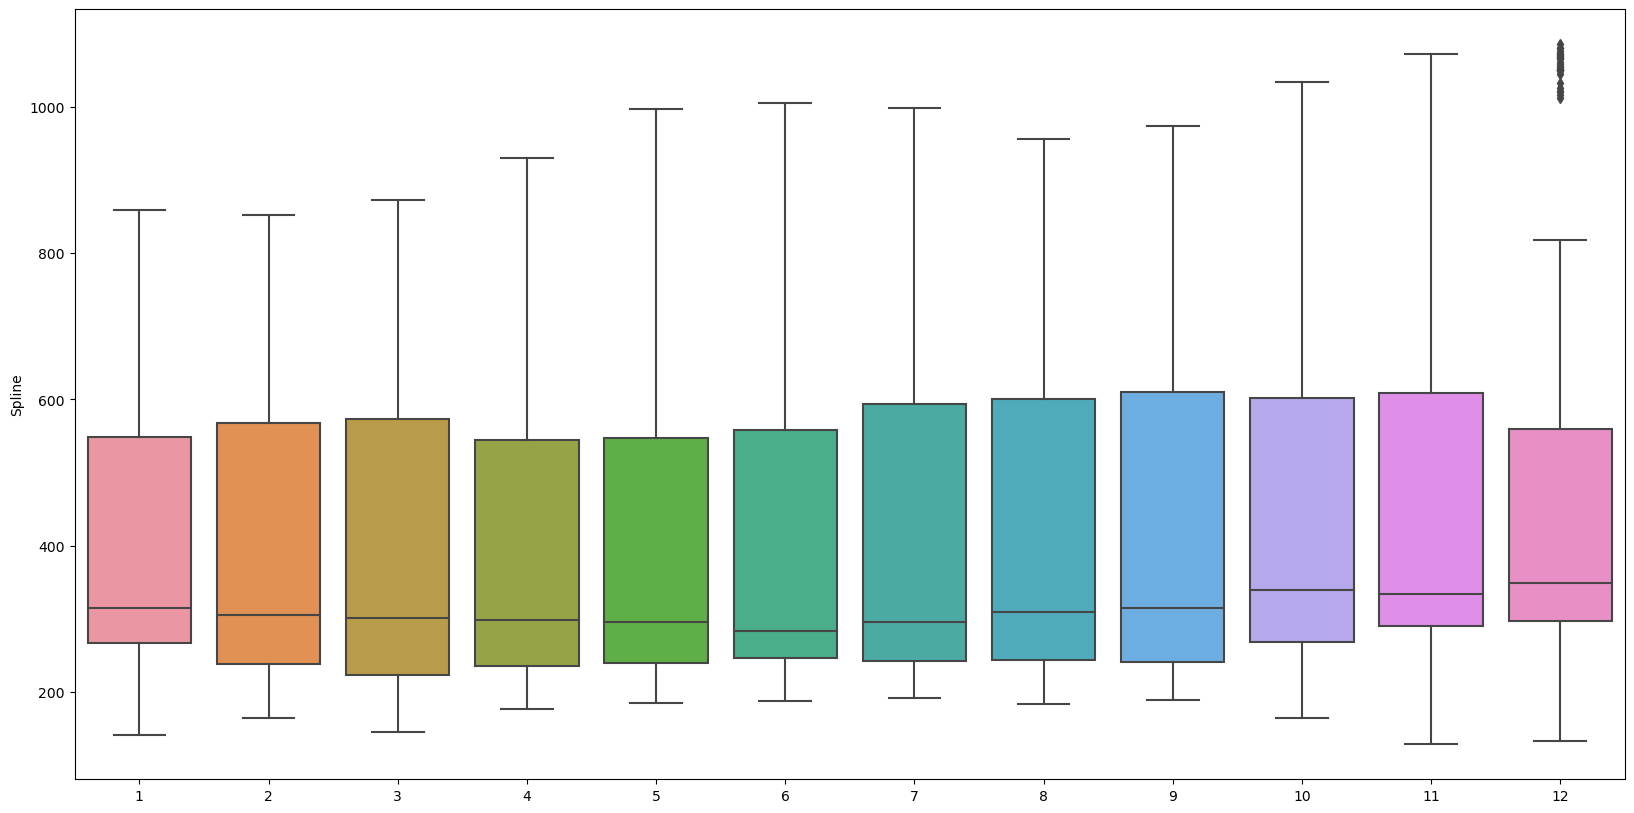

In [52]:
# price variation for each month

fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x = stock_df_imputed.index.month,
                y = stock_df_imputed['Spline'], 
                ax = ax)

In [53]:
df_resample = stock_df_imputed.copy()

# extract only the spline variables
df_resample = df_resample[['Spline']].round(2)
df_resample

,Spline
2006-01-03,217.83
2006-01-04,222.84
2006-01-05,225.85
2006-01-06,233.06
2006-01-07,232.77
...,...
2017-12-25,1064.60
2017-12-26,1065.85
2017-12-27,1060.20
2017-12-28,1055.95


In [54]:
# downsample the data from days to months to reduce variability in the data 
# observe the stock prices on a monthly basis

df_resample_months = df_resample.groupby(pd.Grouper(freq='MS')).median()
#df_resample_months = df_resample.resample('M').median() - #another way of resampling
df_resample_months

,Spline
2006-01-01,222.680
2006-02-01,184.165
2006-03-01,177.120
2006-04-01,205.015
2006-05-01,188.290
...,...
2017-08-01,938.080
2017-09-01,943.030
2017-10-01,998.410
2017-11-01,1044.695


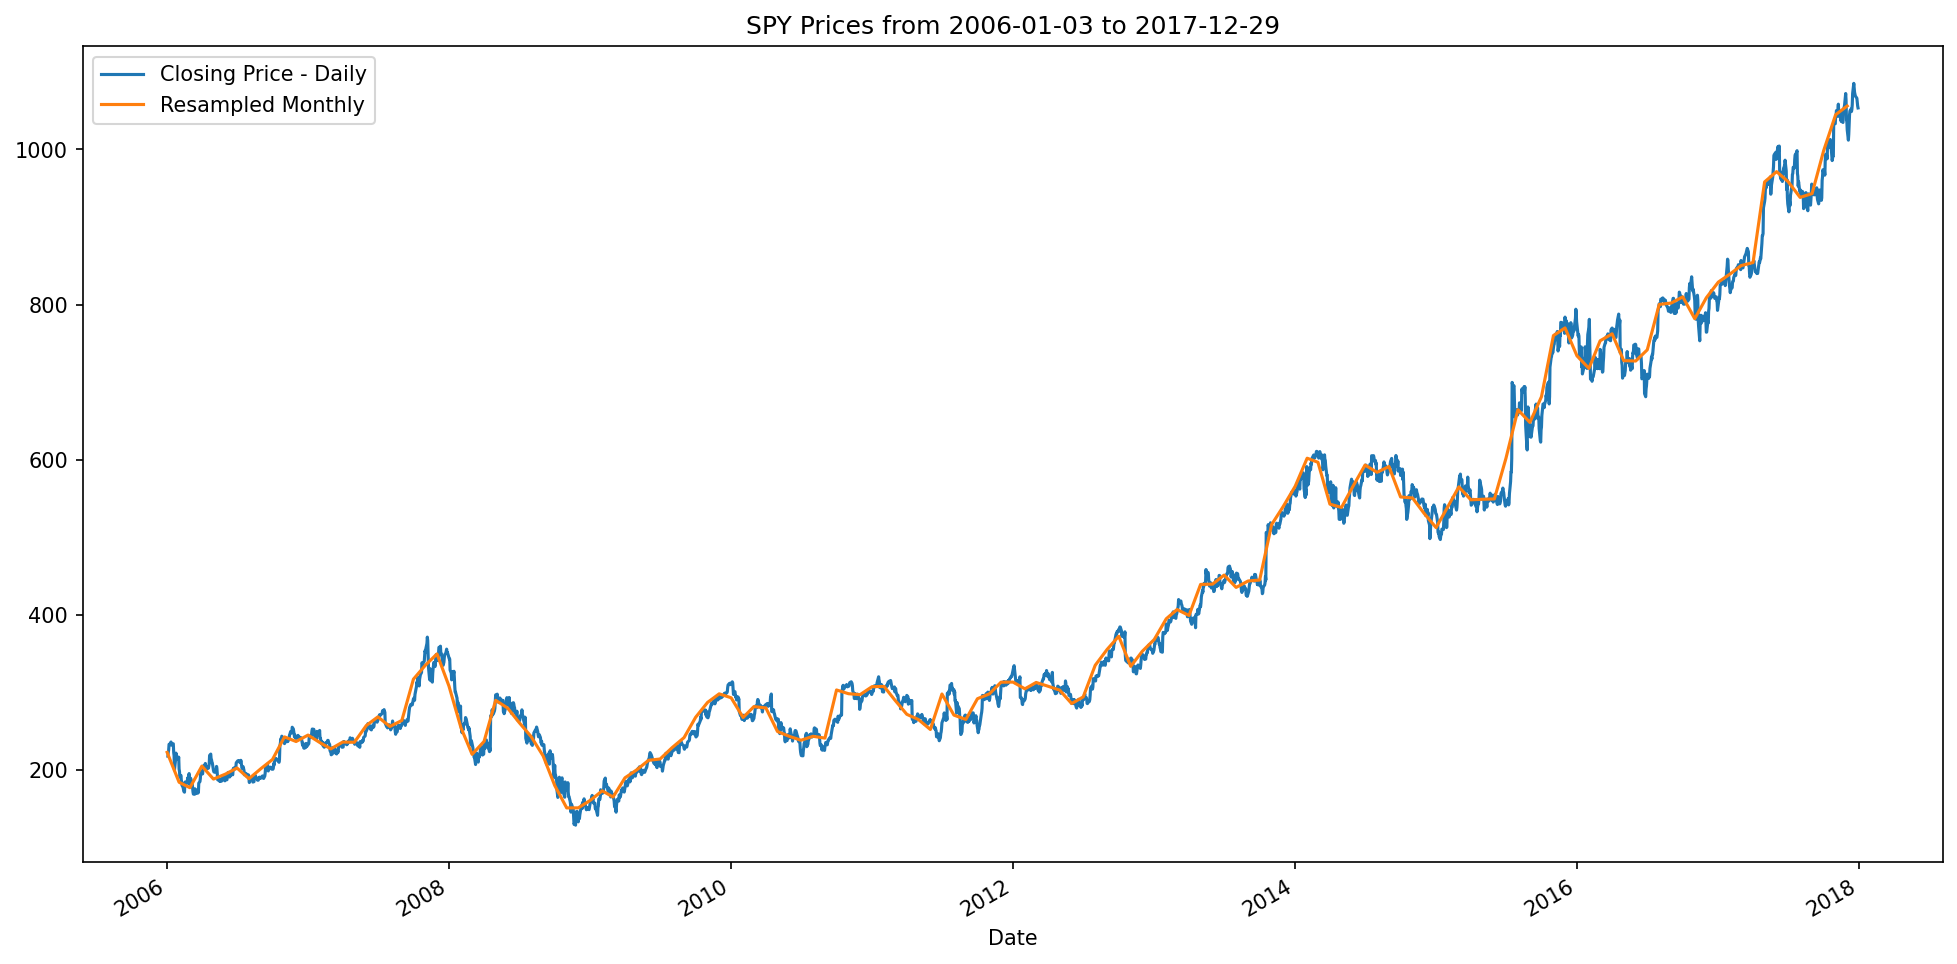

In [55]:
#Plot monthly data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
#df_resample_months['MSFT_Spline'].plot(label='MSFT')
stock_df['Close'].plot(label='Closing Price - Daily')
df_resample_months['Spline'].plot(label='Resampled Monthly')

  
# adding title to the plot
plt.title('SPY Prices from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()

In [56]:
# 6. Autocorrelation or ACF plot


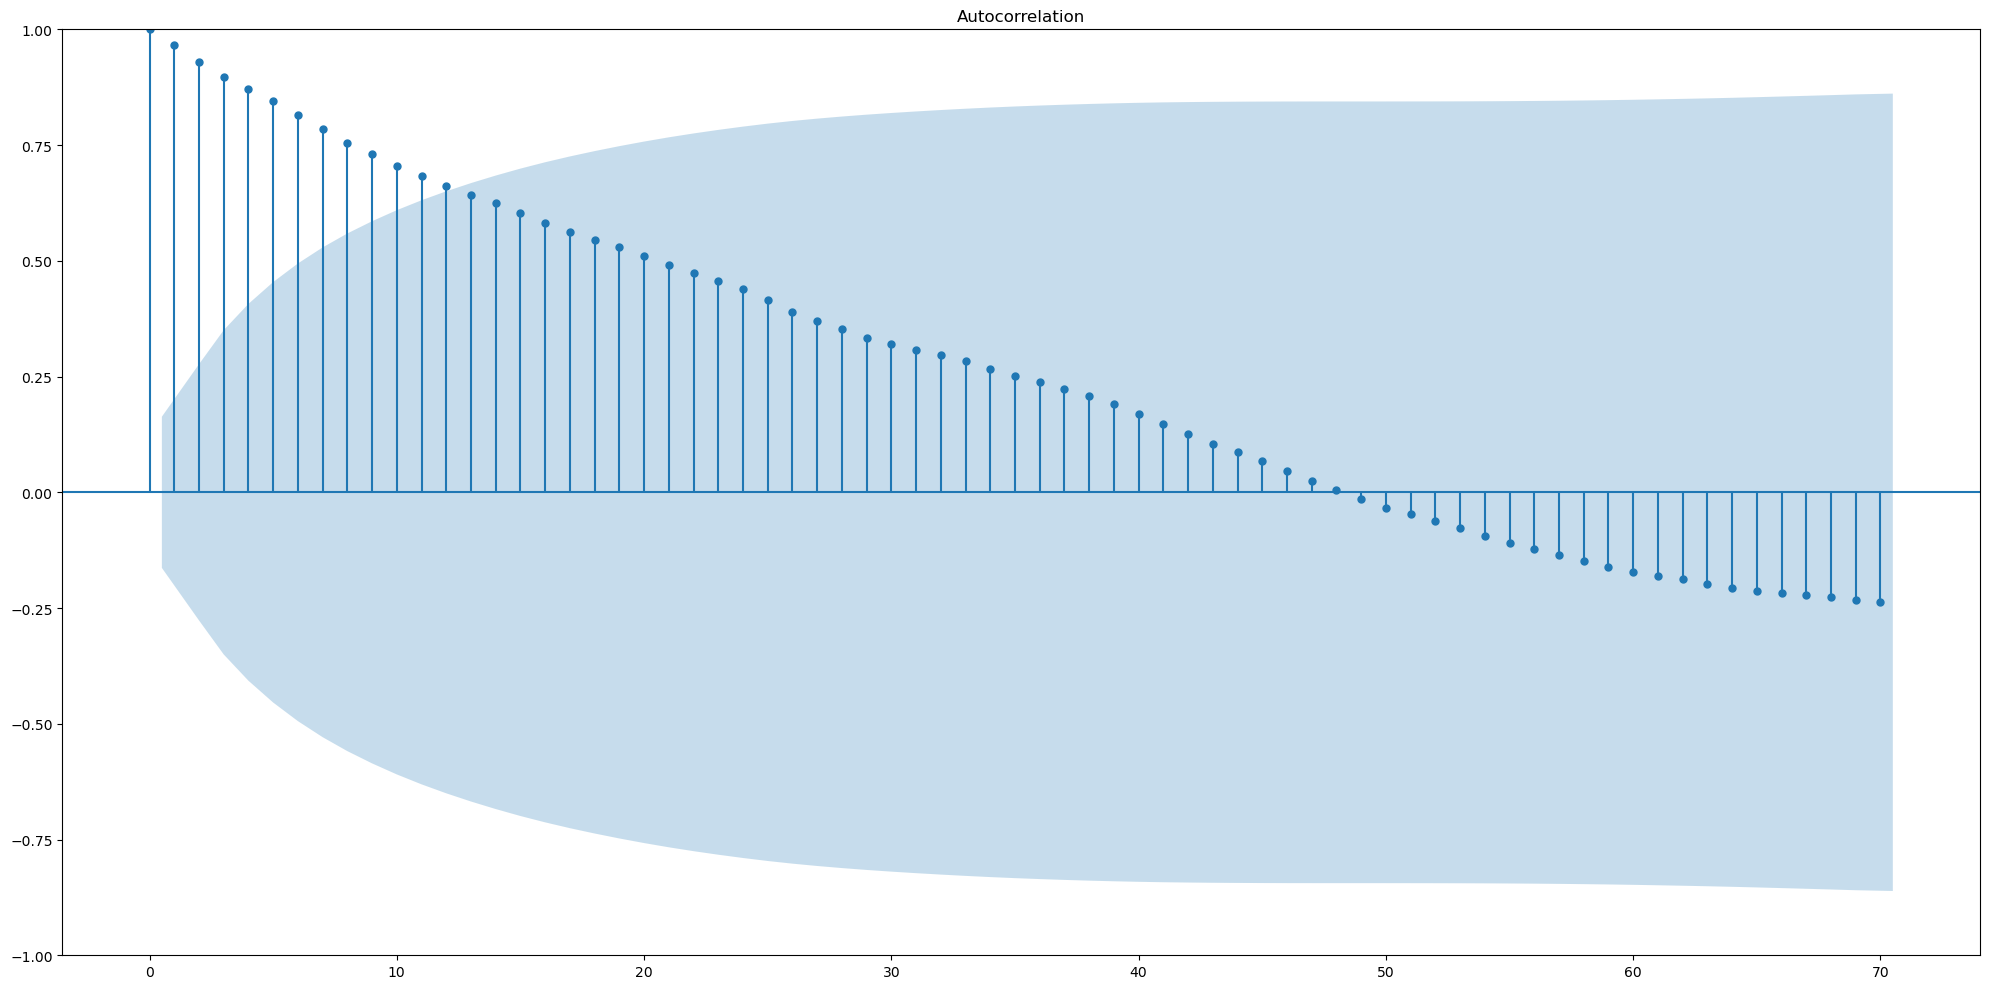

In [57]:
# Calculate the ACF (via statsmodel)
# Source: https://www.alpharithms.com/autocorrelation-time-series-python-432909/

fig = plot_acf(df_resample_months['Spline'], lags=70)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [58]:
# 7. Time Series Decomposition
# Source: https://stackoverflow.com/questions/20672236/time-series-decomposition-function-in-python

Time series decomposition is a process of deconstructing a time series into the following components:

1. Trend — general movement over time
2. Seasonal — behaviors captured in individual seasonal periods
3. Residual — everything not captured by trend and seasonal components


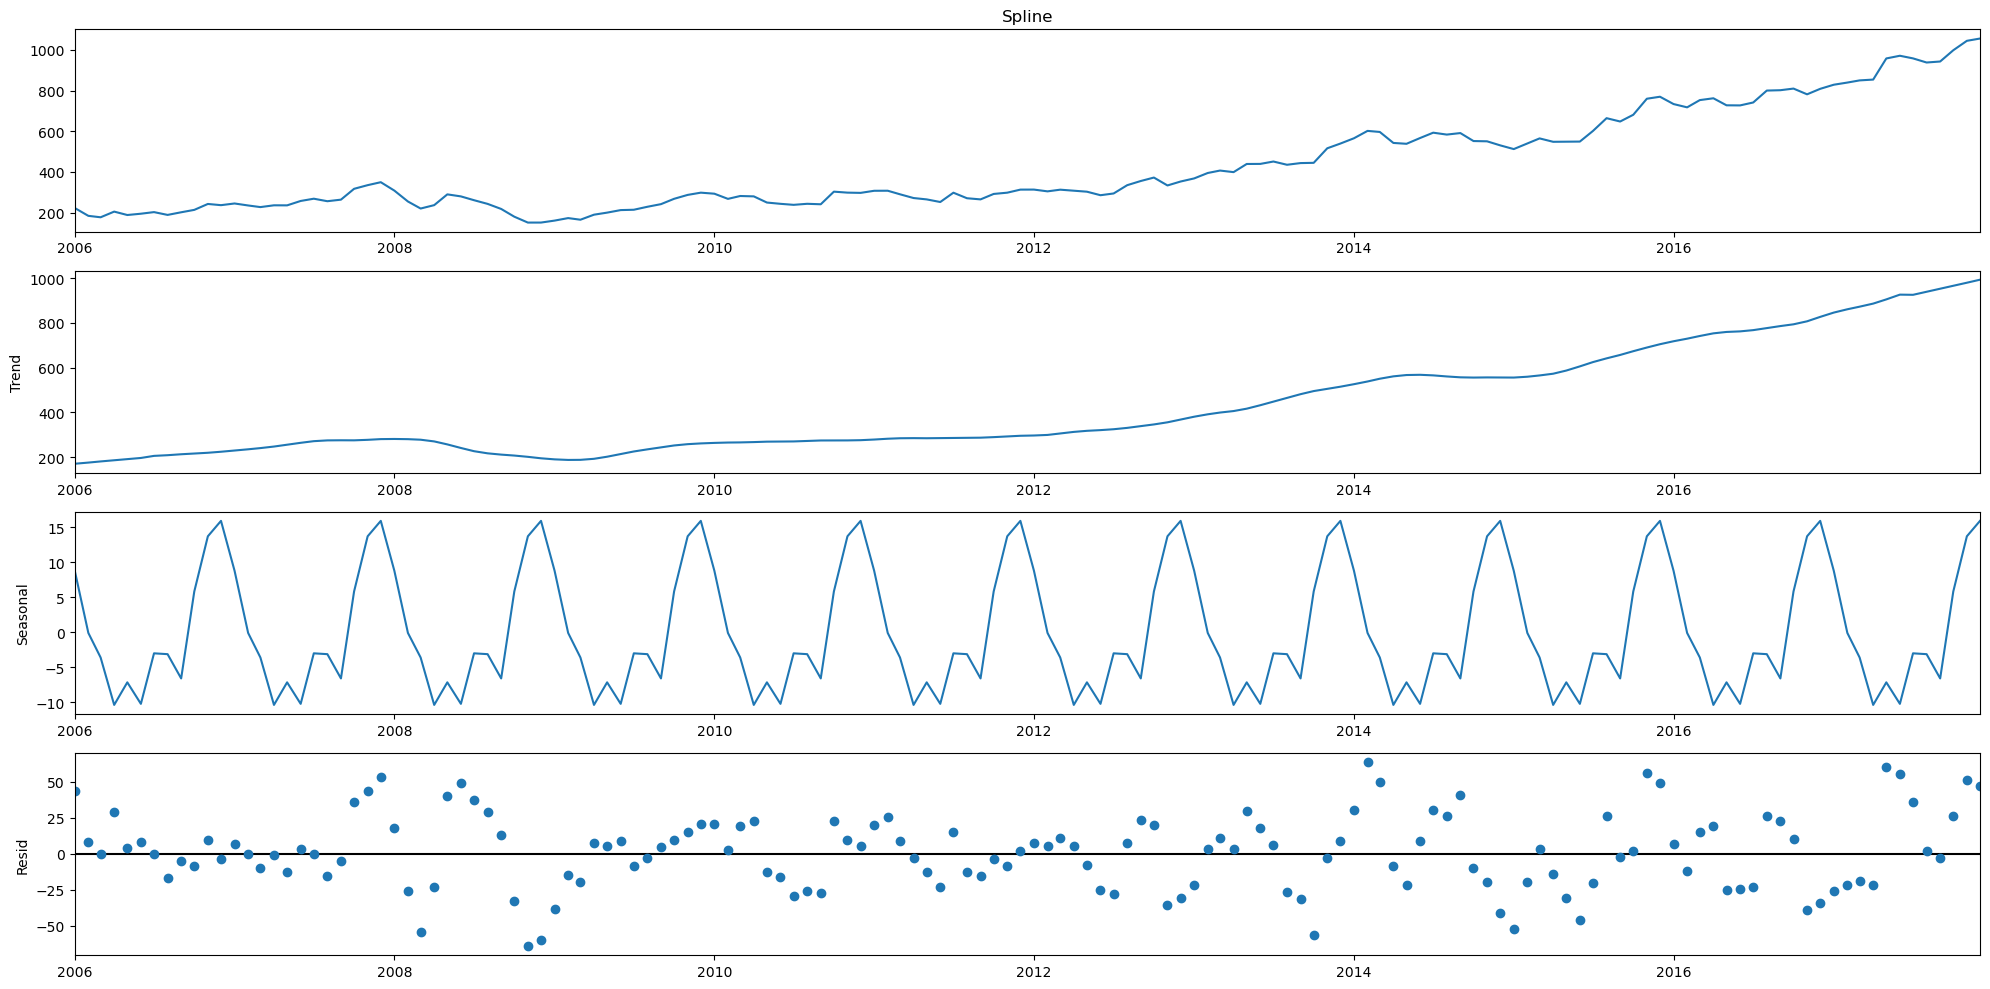

In [60]:
res = sm.tsa.seasonal_decompose(df_resample_months['Spline'], period=12, extrapolate_trend='freq')
fig = res.plot()
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [62]:
google_df = df_resample_months[['Spline']]

# extract the decomposed terms
google_df['trend'] = res.trend
google_df['seasonal'] = res.seasonal
google_df['error'] = res.resid
google_df

,Spline,trend,seasonal,error
2006-01-01,222.680,170.621866,8.768791,43.289343
2006-02-01,184.165,175.788759,-0.100290,8.476531
2006-03-01,177.120,180.955653,-3.604111,-0.231542
2006-04-01,205.015,186.122547,-10.370953,29.263406
2006-05-01,188.290,191.289441,-7.150451,4.151010
...,...,...,...,...
2017-08-01,938.080,939.115428,-3.128971,2.093543
2017-09-01,943.030,952.620740,-6.591740,-2.999000
2017-10-01,998.410,966.126051,5.820387,26.463562
2017-11-01,1044.695,979.631363,13.691993,51.371644


<AxesSubplot:>

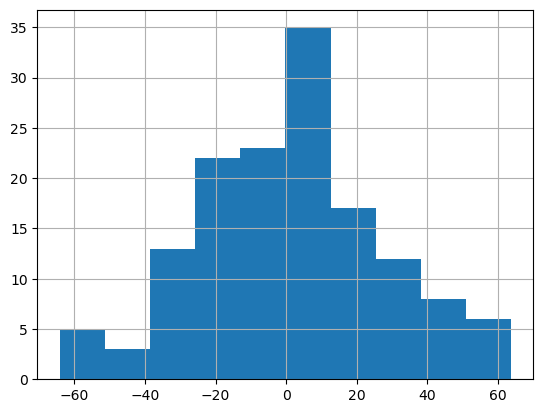

In [63]:
google_df['error'].hist()

In [64]:
df_resample_months

,Spline
2006-01-01,222.680
2006-02-01,184.165
2006-03-01,177.120
2006-04-01,205.015
2006-05-01,188.290
...,...
2017-08-01,938.080
2017-09-01,943.030
2017-10-01,998.410
2017-11-01,1044.695


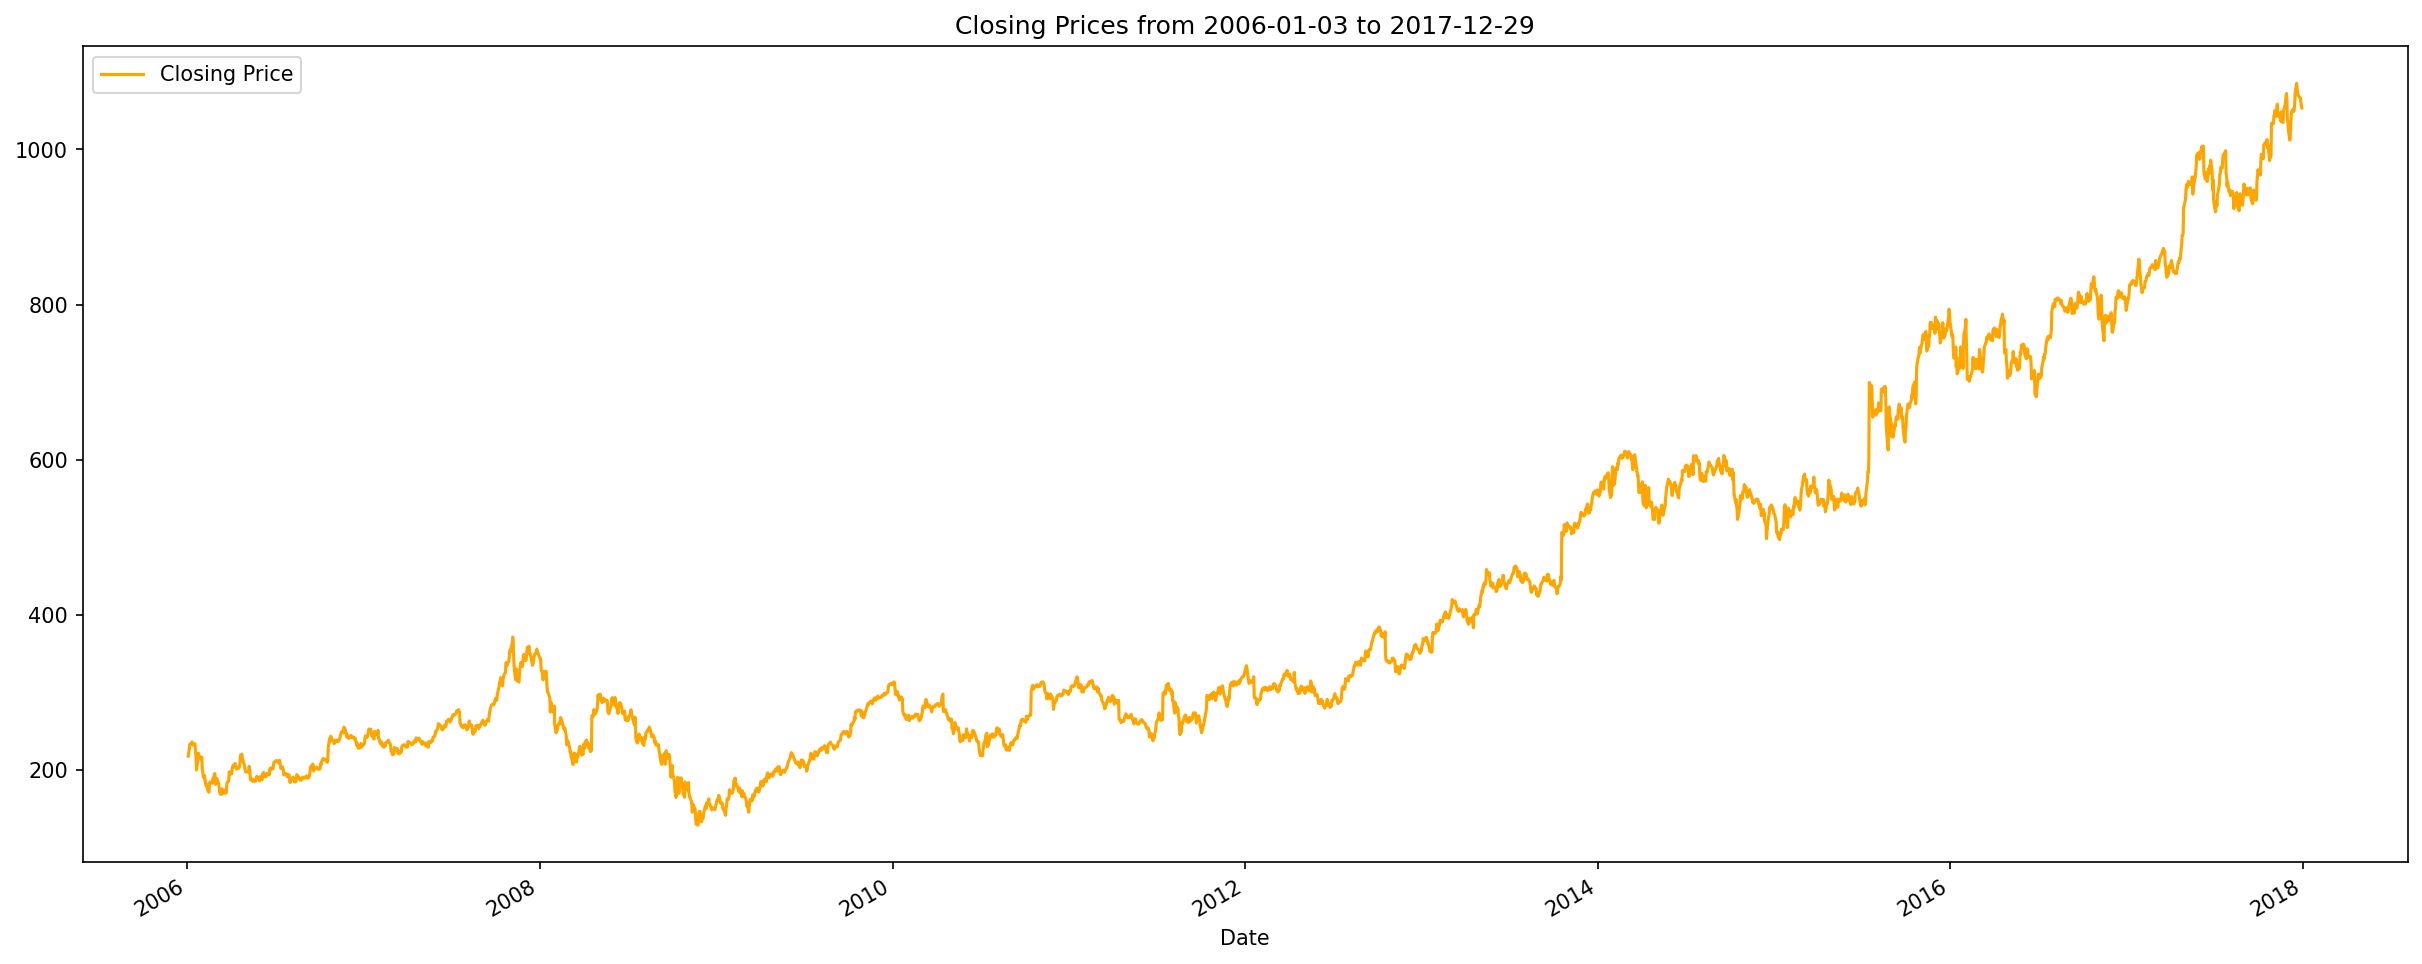

In [66]:
# Visualizing The Close Price of the stocks
  
# to set the plot size
plt.figure(figsize=(20, 8), dpi=150) #dpi = resolution. default 100.
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
stock_df['Close'].plot(label='Closing Price', color='orange')
  
# adding title to the plot
plt.title('Closing Prices from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


In [67]:
df_resample_months

,Spline
2006-01-01,222.680
2006-02-01,184.165
2006-03-01,177.120
2006-04-01,205.015
2006-05-01,188.290
...,...
2017-08-01,938.080
2017-09-01,943.030
2017-10-01,998.410
2017-11-01,1044.695


## Split data into train and test sets

In [70]:
from sklearn.model_selection import train_test_split

# Create a test set of 12 data points
test_size = 12

train_data, test_data = train_test_split(df_resample_months, test_size=test_size, random_state=25, shuffle = False)
#shuffle = False is very important to ensure the order of the data

print(f"No. of training examples: {train_data.shape[0]}")
print(f"No. of testing examples: {test_data.shape[0]}")

No. of training examples: 132
No. of testing examples: 12


In [71]:
train_data

,Spline
2006-01-01,222.680
2006-02-01,184.165
2006-03-01,177.120
2006-04-01,205.015
2006-05-01,188.290
...,...
2016-08-01,800.120
2016-09-01,801.895
2016-10-01,809.900
2016-11-01,781.700


In [72]:
test_data

,Spline
2017-01-01,828.860
2017-02-01,839.495
2017-03-01,850.140
2017-04-01,854.135
2017-05-01,958.060
2017-06-01,971.295
2017-07-01,958.330
2017-08-01,938.080
2017-09-01,943.030
2017-10-01,998.410


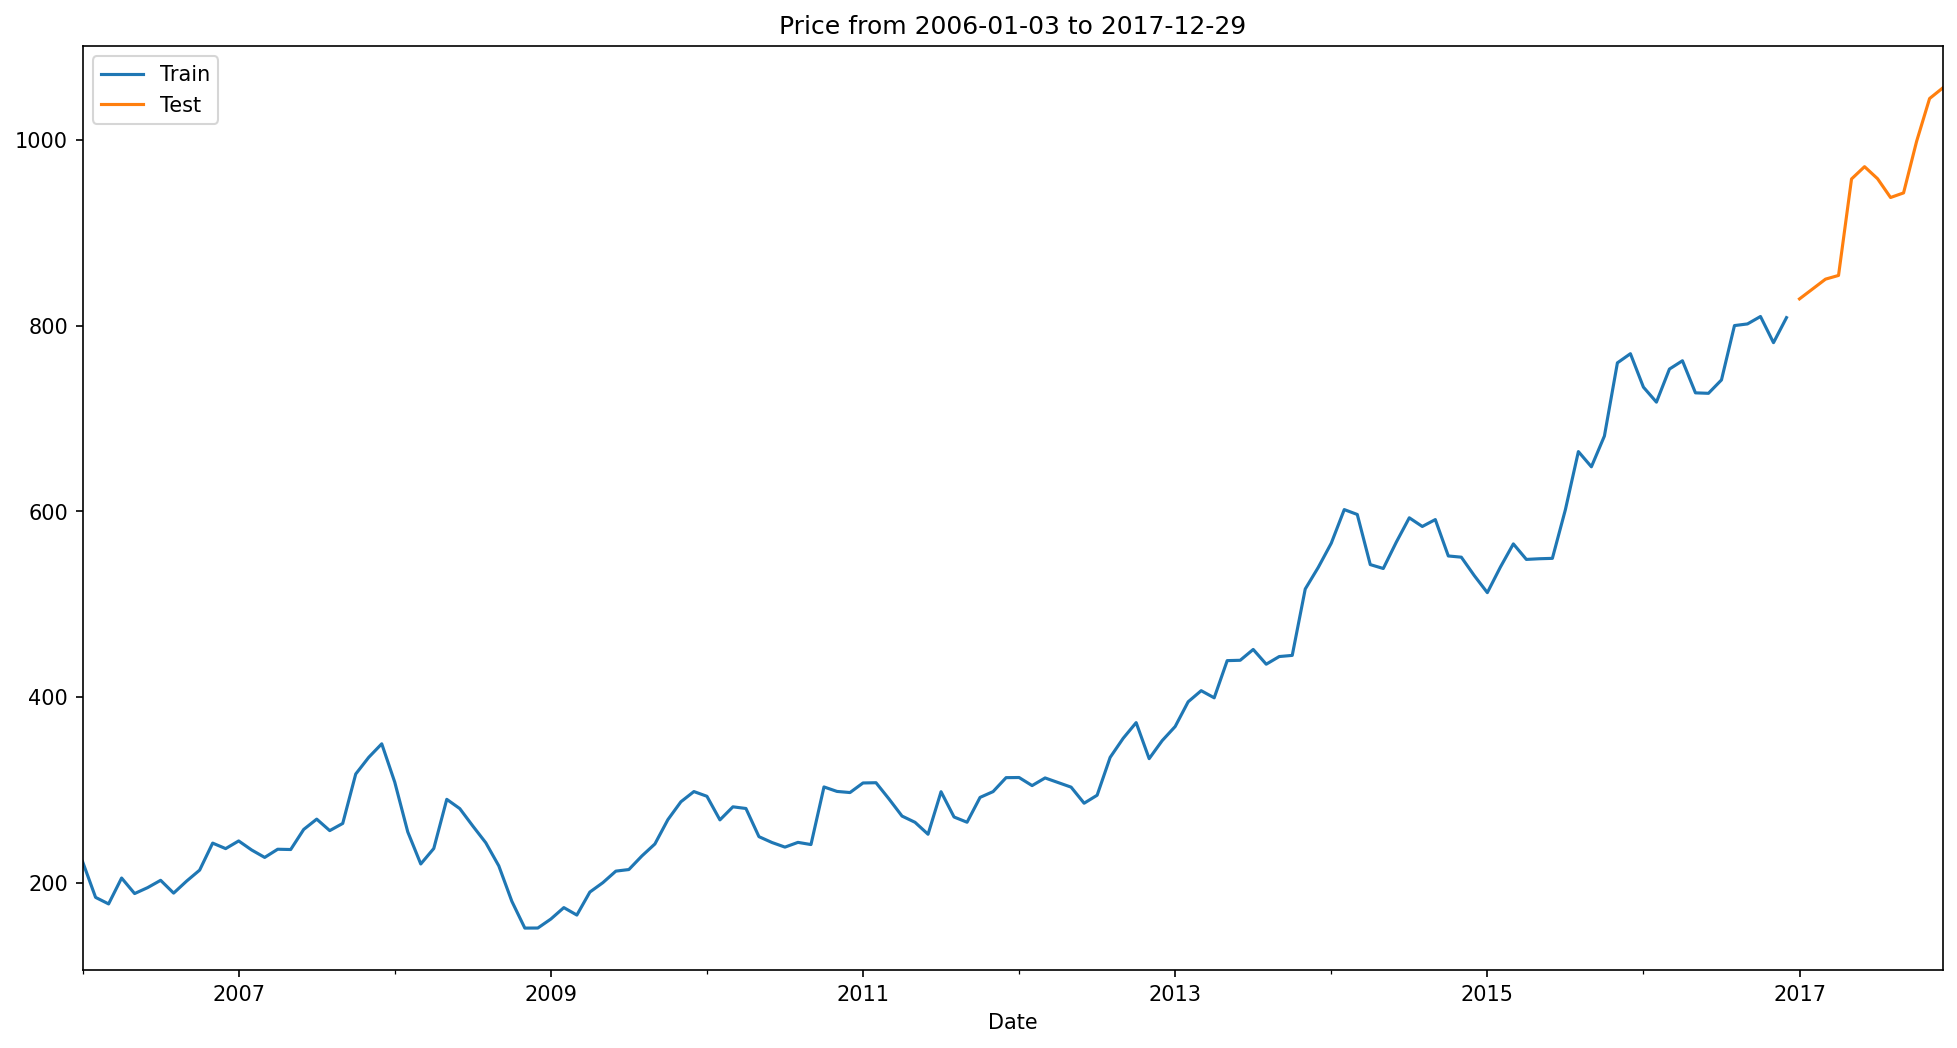

In [73]:
#Plot train and test data

# to set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot close prices.
# in plot method we set the label and color of the curve.
train_data['Spline'].plot(label='Train')
test_data['Spline'].plot(label='Test')

  
# adding title to the plot
plt.title('Price from {} to {}'.format(stock_start_date, stock_end_date))
  
# adding Label to the x-axis
plt.xlabel('Date')
  
# adding legend to the curve
plt.legend()


#### Simple Exponential Smoothing

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). This method is suitable for forecasting data with no clear trend or seasonal pattern. 

For creating a prediction model using SES we should have an (alpha) value which can be hyper parameter tuned. Here we will create three instances in which we will take three different (alpha) values as:

1. (alpha) = 0.2
2. (alpha) = 0.5
3. (alpha) value automatically optimized by statsmodel which is the recommended one.

We will pass the data into Simple Exponential Smoothing and fit the data with different values of the Smoothing Level.

In [74]:
#First Instance
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(12).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.5,optimized=False)
ins_cast2 = ins2.forecast(12).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(12).rename('alpha=%s'%ins3.model.params['smoothing_level'])


In [75]:
ins_cast1

2017-01-01    775.011571
2017-02-01    775.011571
2017-03-01    775.011571
2017-04-01    775.011571
2017-05-01    775.011571
2017-06-01    775.011571
2017-07-01    775.011571
2017-08-01    775.011571
2017-09-01    775.011571
2017-10-01    775.011571
2017-11-01    775.011571
2017-12-01    775.011571
Freq: MS, Name: alpha=0.2, dtype: float64

In [76]:
test_data

,Spline
2017-01-01,828.860
2017-02-01,839.495
2017-03-01,850.140
2017-04-01,854.135
2017-05-01,958.060
2017-06-01,971.295
2017-07-01,958.330
2017-08-01,938.080
2017-09-01,943.030
2017-10-01,998.410


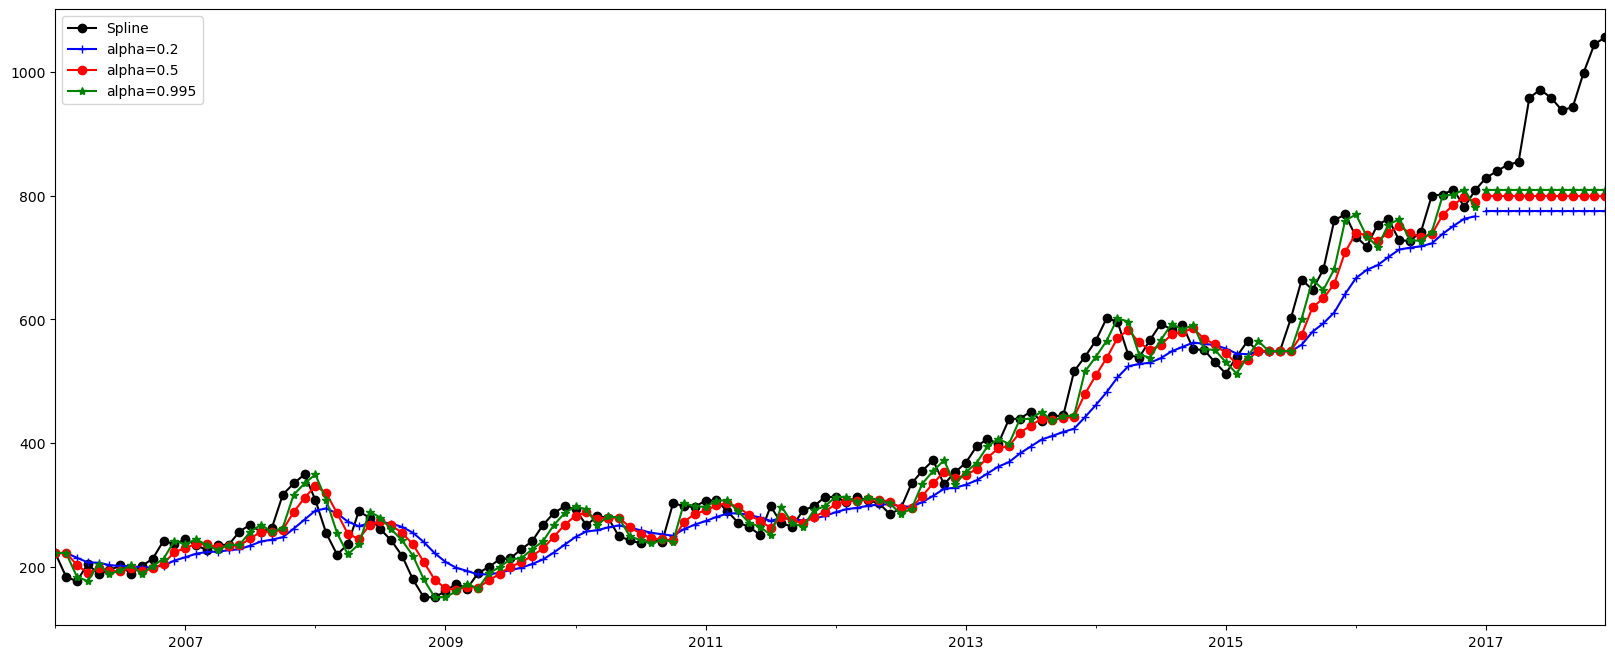

In [78]:
#After creating model we will visualize the plot
ax = df_resample_months.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.5
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')

plt.show()

#### Double Exponential Smoothing 

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend. This method has two smoothing equations and hence two parameters, alpha and beta, (one for the level and one for the trend). 

In [79]:
# Double ETS
# Let us fit the data on Double ES, on both Additive and Multiplicative Trend

In [80]:
double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(12)
double_ets_mul_pred = double_ets_mul.forecast(12)


D:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


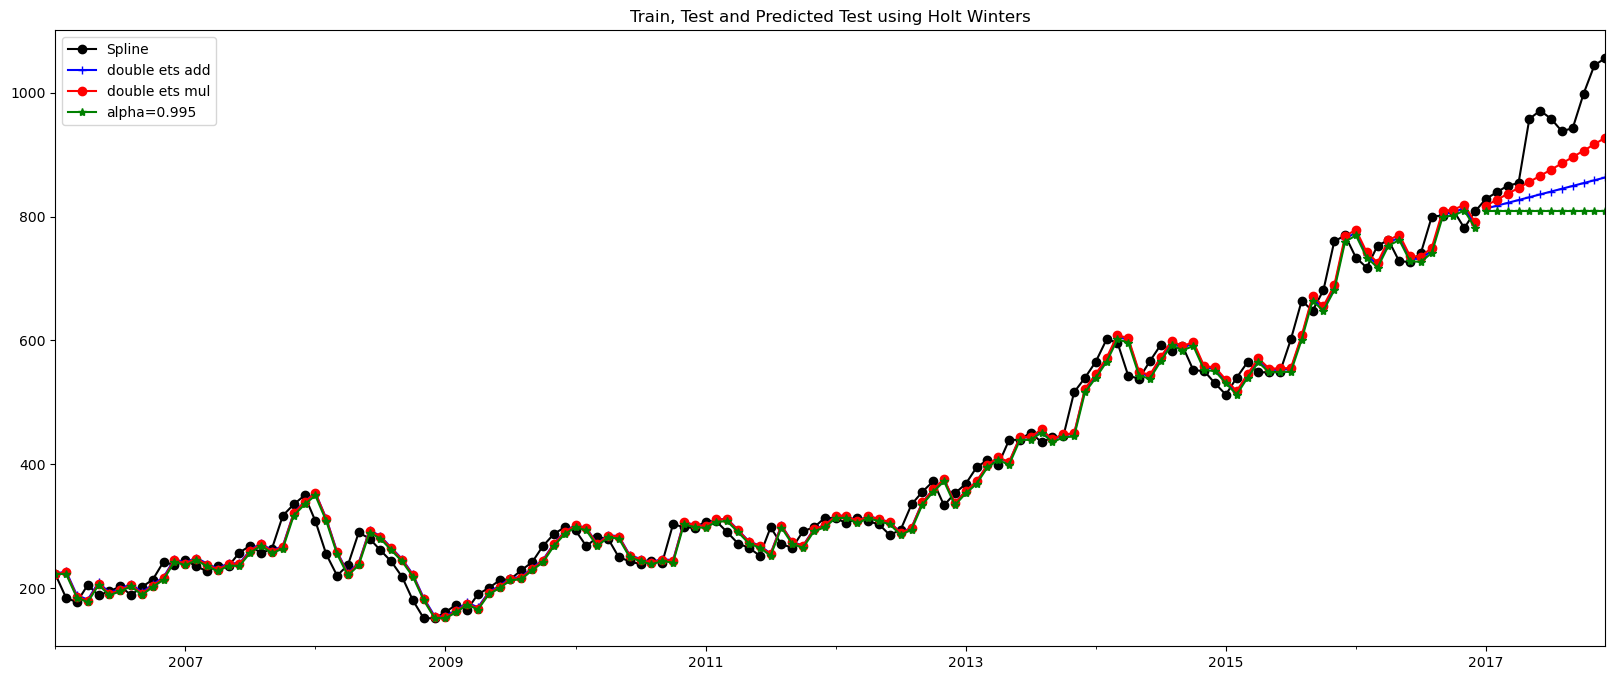

In [81]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = df_resample_months.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
double_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'double ets add')
double_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
double_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'double ets mul')
double_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Holt Winters')
plt.show()



#### Triple Exponential Smoothing 

This is the extended version of simple exponential smoothing to allow the forecasting of data with a trend and seasonality. This method has three smoothing equations and hence three parameters - alpha, beta, and gamma. (one each for the level, trend, and seasonality).

In [82]:
# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()

triple_ets_add_pred = triple_ets_add.forecast(12)
triple_ets_mul_pred = triple_ets_mul.forecast(12)


D:\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


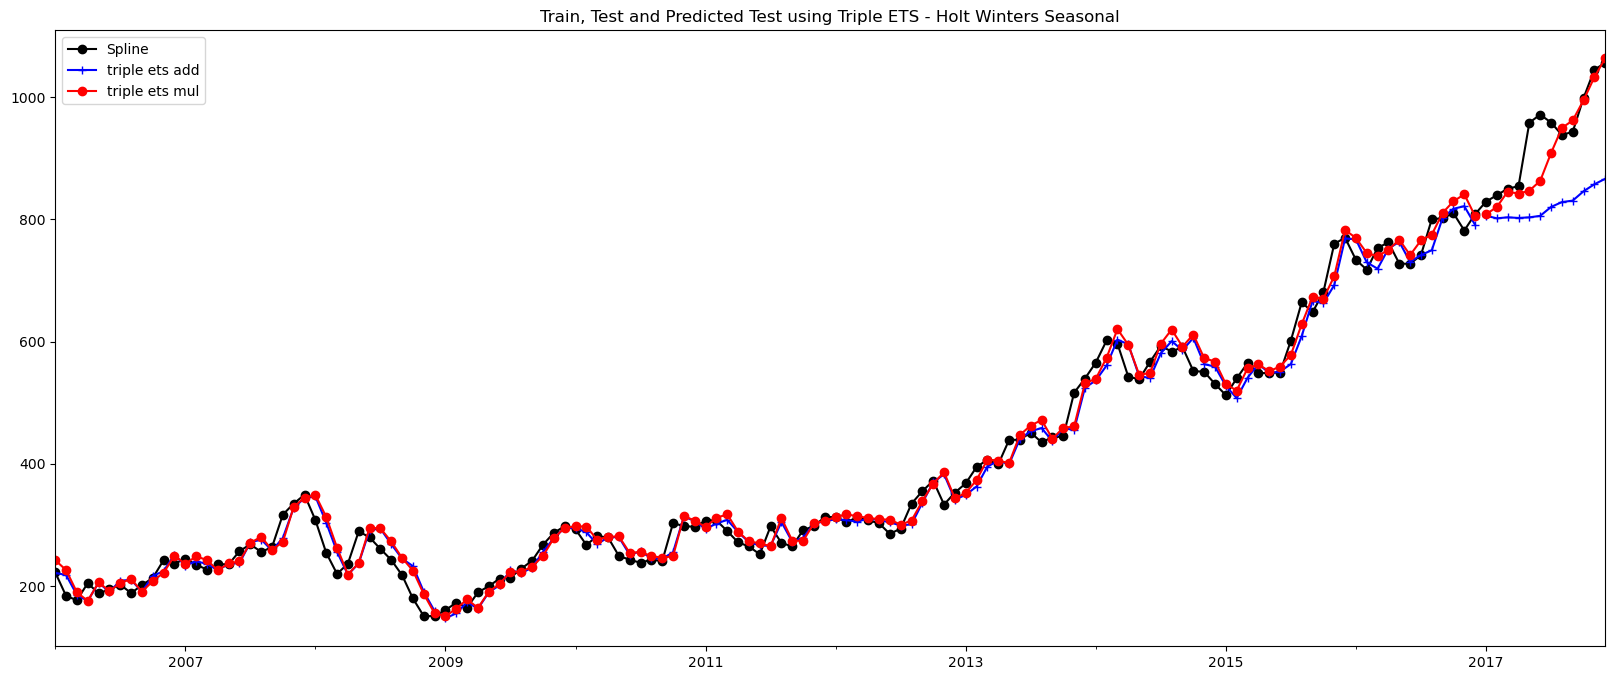

In [83]:
#plot the train, test, and predictions

#After creating model we will visualize the plot
ax = df_resample_months.plot(marker='o', color='black', figsize=(20,8), legend=True)

#Plot for double ETS additive
triple_ets_add_pred.plot(marker='+', ax=ax, color='blue', legend=True, label = 'triple ets add')
triple_ets_add.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for double ETS multiplicative
triple_ets_mul_pred.plot(marker='o', ax=ax, color='red', legend=True, label = 'triple ets mul')
triple_ets_mul.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for simple exponential smooting alpha=Optimized by statsmodel
#ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
#ins3.fittedvalues.plot(marker='*', ax=ax, color='green')
plt.title('Train, Test and Predicted Test using Triple ETS - Holt Winters Seasonal')
plt.show()

## Visualize Forecast Errors

Source: https://machinelearningmastery.com/visualize-time-series-residual-forecast-errors-with-python/

In [84]:
# Residual Plots / Residual Diagnostics. What are residuals?

In [85]:
test_data

,Spline
2017-01-01,828.860
2017-02-01,839.495
2017-03-01,850.140
2017-04-01,854.135
2017-05-01,958.060
2017-06-01,971.295
2017-07-01,958.330
2017-08-01,938.080
2017-09-01,943.030
2017-10-01,998.410


In [86]:
#calculate residuals
residuals = [test_data.values.flatten()[i]-triple_ets_add_pred.values.flatten()[i] for i in range(len(test_data))]
residuals = pd.DataFrame(residuals)

In [87]:
residuals

,0
0,22.960233
1,37.845682
2,46.861260
3,51.871547
4,154.848969
5,165.621548
6,138.123568
7,109.916469
8,112.417482
9,152.555135


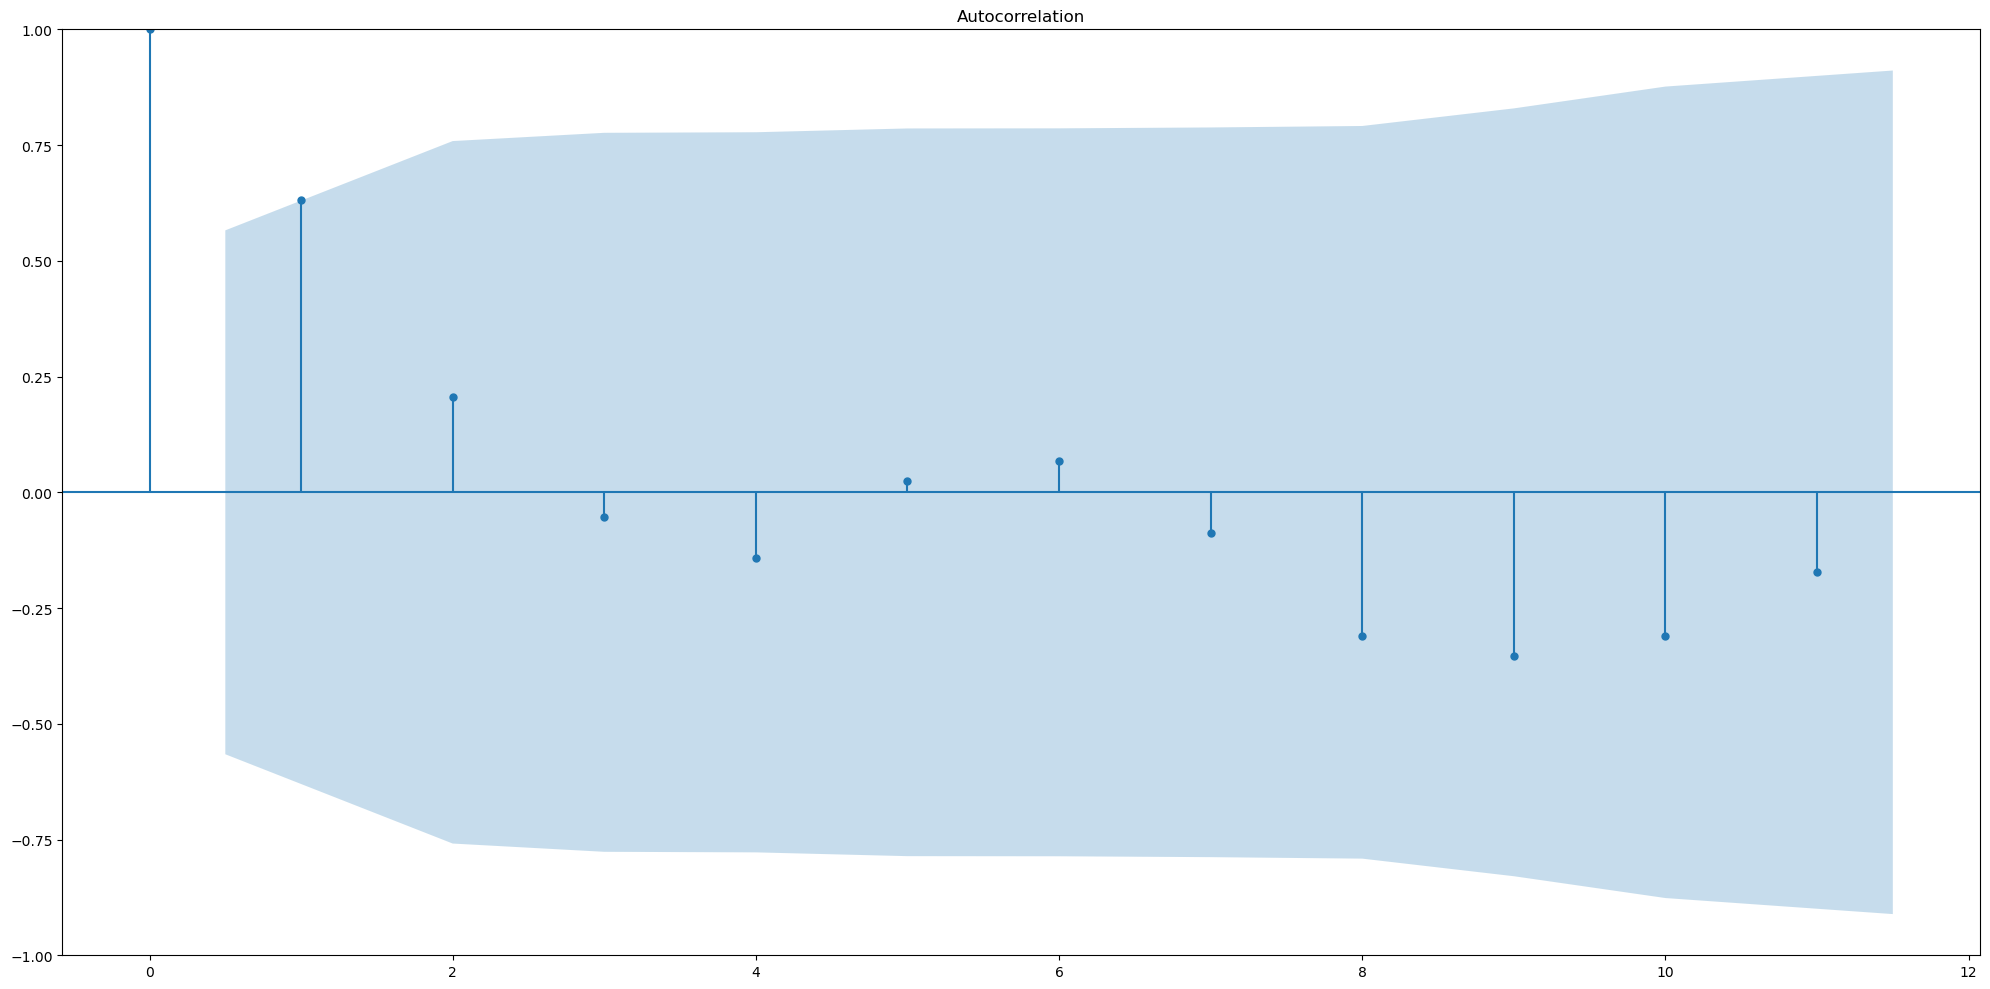

In [88]:

fig = plot_acf(residuals)
fig.set_size_inches((20, 10))
# Tight layout to realign things
fig.tight_layout()
plt.show()

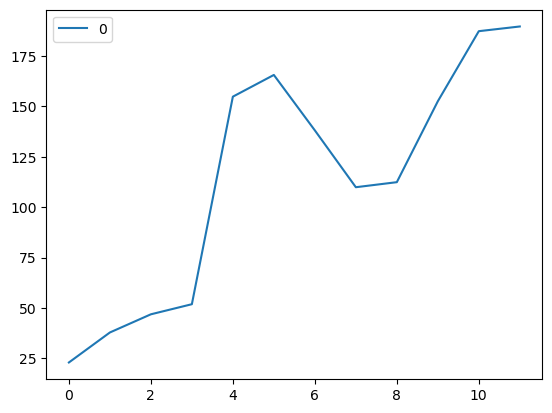

In [89]:
# plot residuals
residuals.plot()
plt.show()

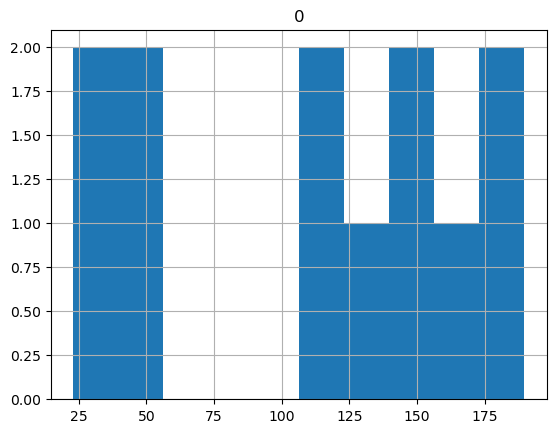

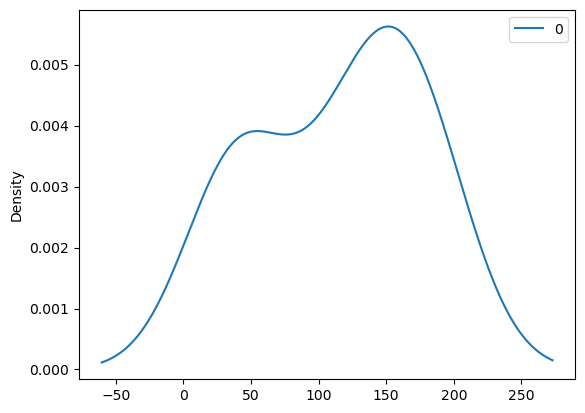

In [90]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

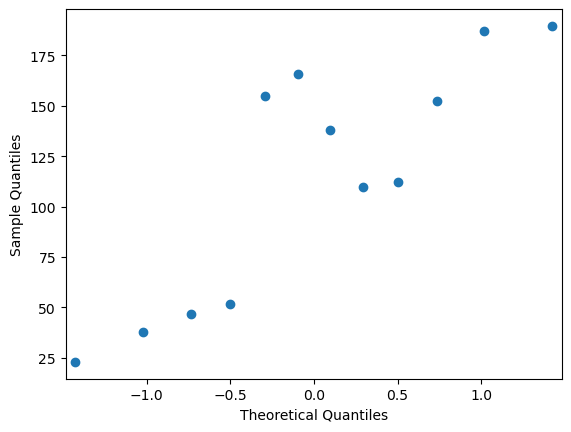

In [91]:
qqplot(residuals)
plt.show()

### Model evaluation

In [92]:
#define metrics dataframe which will be used below for 
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

                                 
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

In [93]:
#get all the metrics
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast1.values.flatten(), 
                                'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast2.values.flatten(), 
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast3.values.flatten(), 
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_add_pred.values.flatten(), 
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_mul_pred.values.flatten(), 
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_add_pred.values.flatten(), 
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_mul_pred.values.flatten(), 
                                'Triple Mul')


C:\Users\Aastha Shah\AppData\Local\Temp\ipykernel_40884\3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Aastha Shah\AppData\Local\Temp\ipykernel_40884\3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Aastha Shah\AppData\Local\Temp\ipykernel_40884\3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)
C:\Users\Aastha Shah\AppData\Local\Temp\ipykernel_40884\3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)


In [94]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,Triple Mul,48.555323,31.661551,3.350365
0,Double Mul,78.960165,64.999338,6.612581
0,Double Add,115.543838,98.424419,10.054695
0,Triple Add,127.930471,114.168918,11.775223
0,Simple 1,148.420818,128.160863,13.123270
0,Simple 0.5,156.588748,137.537280,14.130749
0,Simple 0.2,178.182032,161.695096,16.726461


In [95]:
df_resample_months.tail(12).mean()


Spline    936.706667
dtype: float64

In [97]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

# Add all predictions 
test_pred_df = test_pred_df.assign(Triple_Mul_pred = triple_ets_mul_pred.values.flatten(),
                                   Double_mul = double_ets_mul_pred.values.flatten(),
                                   Double_add = double_ets_add_pred.values.flatten())

test_pred_df

,Spline,Triple_Mul_pred,Double_mul,Double_add
2017-01-01,828.860,808.121290,817.925763,813.177095
2017-02-01,839.495,820.155498,827.333991,817.741668
2017-03-01,850.140,845.342911,836.850437,822.306241
2017-04-01,854.135,842.022765,846.476347,826.870814
2017-05-01,958.060,846.888359,856.212979,831.435388
2017-06-01,971.295,862.837920,866.061607,835.999961
2017-07-01,958.330,908.338779,876.023520,840.564534
2017-08-01,938.080,949.380757,886.100020,845.129107
2017-09-01,943.030,961.752750,896.292425,849.693680
2017-10-01,998.410,994.764546,906.602068,854.258254


In [98]:
# Create an average prediction from the three and check it's metrics
test_pred_df['Average_Predictions'] = (test_pred_df['Triple_Mul_pred']+test_pred_df['Double_mul']+test_pred_df['Double_add'])/3
test_pred_df


,Spline,Triple_Mul_pred,Double_mul,Double_add,Average_Predictions
2017-01-01,828.860,808.121290,817.925763,813.177095,813.074716
2017-02-01,839.495,820.155498,827.333991,817.741668,821.743719
2017-03-01,850.140,845.342911,836.850437,822.306241,834.833197
2017-04-01,854.135,842.022765,846.476347,826.870814,838.456642
2017-05-01,958.060,846.888359,856.212979,831.435388,844.845575
2017-06-01,971.295,862.837920,866.061607,835.999961,854.966496
2017-07-01,958.330,908.338779,876.023520,840.564534,874.975611
2017-08-01,938.080,949.380757,886.100020,845.129107,893.536628
2017-09-01,943.030,961.752750,896.292425,849.693680,902.579618
2017-10-01,998.410,994.764546,906.602068,854.258254,918.541623


In [99]:
metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                test_pred_df['Average_Predictions'].values.flatten(), 
                                'Average')

metrics_dataframe

C:\Users\Aastha Shah\AppData\Local\Temp\ipykernel_40884\3815975548.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = metrics_dataframe.append(df)


,Model,RMSE,MAE,MAPE
0,Simple 0.2,178.182032,161.695096,16.726461
0,Simple 0.5,156.588748,137.537280,14.130749
0,Simple 1,148.420818,128.160863,13.123270
0,Double Add,115.543838,98.424419,10.054695
0,Double Mul,78.960165,64.999338,6.612581
0,Triple Add,127.930471,114.168918,11.775223
0,Triple Mul,48.555323,31.661551,3.350365
0,Average,74.751999,62.947922,6.456254


In [100]:
metrics_dataframe.sort_values(by='MAE')

,Model,RMSE,MAE,MAPE
0,Triple Mul,48.555323,31.661551,3.350365
0,Average,74.751999,62.947922,6.456254
0,Double Mul,78.960165,64.999338,6.612581
0,Double Add,115.543838,98.424419,10.054695
0,Triple Add,127.930471,114.168918,11.775223
0,Simple 1,148.420818,128.160863,13.123270
0,Simple 0.5,156.588748,137.537280,14.130749
0,Simple 0.2,178.182032,161.695096,16.726461
